In [3]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('fullData/full_dataSorted.csv', parse_dates=['Datetime'])

# Muestra el dataframe
print(df)

               Fecha                Hora  latitud  longitud  corrientePico  \
0         2015-01-01  17:49:38.187316965  26.0828 -109.9644           -9.3   
1         2015-01-01  17:49:38.116536534  26.0921 -109.9014           -5.0   
2         2015-01-01  17:49:38.082890357  26.0825 -109.8886          -19.9   
3         2015-01-01  17:49:38.026770247  26.0778 -109.9338          -31.7   
4         2015-01-01  20:17:30.876020136  26.7110 -109.2636          234.0   
...              ...                 ...      ...       ...            ...   
80775579  2019-12-28  09:16:59.828122367  24.9845 -105.9646         -296.4   
80775580  2019-12-28  09:17:00.133464372  24.9448 -105.9516           -6.8   
80775581  2019-12-31  23:42:26.426682061  26.9430 -111.0635           19.2   
80775582  2019-12-31  23:45:54.527168476  27.1344 -110.9009           78.6   
80775583  2019-12-31  23:48:34.648615741  26.9161 -111.0204           -7.5   

                    Datetime  
0        2015-01-01 17:49:38  
1

In [4]:
%%time

latMin=df["latitud"].min()
latMax=df["latitud"].max()

lonMax=df["longitud"].max()
lonMin=df["longitud"].min()

print("Latitud minima en los datos: "+str(latMin))
print("Latitud maxima en los datos: "+str(latMax))
print("Longitud minima en los datos: "+str(lonMin))
print("Longitud maxima en los datos: "+str(lonMax))


grados=(0.05)#grados del tamaño de cuadricula 0.009 aprox 1 km  (1/111.1)
print("Resolucion en grados: "+str(grados))

Latitud minima en los datos: 20.9479
Latitud maxima en los datos: 31.9364
Longitud minima en los datos: -113.2693
Longitud maxima en los datos: -102.0989
Resolucion en grados: 0.05
CPU times: user 732 ms, sys: 68 ms, total: 801 ms
Wall time: 798 ms


In [5]:
import math
yLen=math.ceil((latMax-latMin)/0.045+1)
print(yLen)
xLen=math.ceil(abs((lonMin-lonMax)/0.045-1))
print(xLen)

246
250


In [6]:
%%time
df["y"]=((latMax-df["latitud"]))/grados
df["x"]=((abs(lonMin-df["longitud"]))/grados)
df = df.astype({'x':'int'})
df = df.astype({'y':'int'})

CPU times: user 6.24 s, sys: 3.27 s, total: 9.51 s
Wall time: 9.49 s


In [7]:
df

,Fecha,Hora,latitud,longitud,corrientePico,Datetime,y,x
0,2015-01-01,17:49:38.187316965,26.0828,-109.9644,-9.3,2015-01-01 17:49:38,117,66
1,2015-01-01,17:49:38.116536534,26.0921,-109.9014,-5.0,2015-01-01 17:49:38,116,67
2,2015-01-01,17:49:38.082890357,26.0825,-109.8886,-19.9,2015-01-01 17:49:38,117,67
3,2015-01-01,17:49:38.026770247,26.0778,-109.9338,-31.7,2015-01-01 17:49:38,117,66
4,2015-01-01,20:17:30.876020136,26.7110,-109.2636,234.0,2015-01-01 20:17:31,104,80
...,...,...,...,...,...,...,...,...
80775579,2019-12-28,09:16:59.828122367,24.9845,-105.9646,-296.4,2019-12-28 09:17:00,139,146
80775580,2019-12-28,09:17:00.133464372,24.9448,-105.9516,-6.8,2019-12-28 09:17:00,139,146
80775581,2019-12-31,23:42:26.426682061,26.9430,-111.0635,19.2,2019-12-31 23:42:26,99,44
80775582,2019-12-31,23:45:54.527168476,27.1344,-110.9009,78.6,2019-12-31 23:45:55,96,47


In [8]:
vPh=df.groupby([pd.Grouper(key='Datetime', freq='H')]).size().reset_index(name='count')

In [9]:
vPd=df.groupby([pd.Grouper(key='Datetime', freq='D')]).size().reset_index(name='count')

In [10]:
vPh

,Datetime,count
0,2015-01-01 17:00:00,4
1,2015-01-01 18:00:00,0
2,2015-01-01 19:00:00,0
3,2015-01-01 20:00:00,3
4,2015-01-01 21:00:00,8
...,...,...
43802,2019-12-31 19:00:00,0
43803,2019-12-31 20:00:00,0
43804,2019-12-31 21:00:00,0
43805,2019-12-31 22:00:00,0


In [11]:
vPd

,Datetime,count
0,2015-01-01,36
1,2015-01-02,9689
2,2015-01-03,1649
3,2015-01-04,0
4,2015-01-05,155
...,...,...
1821,2019-12-27,27
1822,2019-12-28,100
1823,2019-12-29,0
1824,2019-12-30,0


In [12]:
valoresPorHora=df.groupby([pd.Grouper(key='Datetime', freq='H'), 'x', 'y']).size().reset_index(name='count')

In [13]:
valoresPorHora

,Datetime,x,y,count
0,2015-01-01 17:00:00,66,117,2
1,2015-01-01 17:00:00,67,116,1
2,2015-01-01 17:00:00,67,117,1
3,2015-01-01 20:00:00,79,104,1
4,2015-01-01 20:00:00,80,104,1
...,...,...,...,...
6986396,2019-12-28 09:00:00,147,138,1
6986397,2019-12-28 09:00:00,147,140,1
6986398,2019-12-31 23:00:00,44,99,1
6986399,2019-12-31 23:00:00,44,100,1


In [14]:
%%time

start_time = datetime(2015, 1, 1, 0, 0)
end_time = datetime(2020, 1, 1, 0, 0)
matrices=[]
while start_time < end_time:
    temp=valoresPorHora[valoresPorHora["Datetime"]==start_time]
    a = np.zeros((yLen, xLen))
    if(len(temp)>0):
        for index, row in temp.iterrows():
            a[row["y"], row["x"]]=row["count"]
    matrices.append(a)
    start_time += timedelta(hours=1)

CPU times: user 19min 58s, sys: 10.2 s, total: 20min 8s
Wall time: 20min 7s


In [15]:
valores=np.array([])
for i in range(len(matrices)):
    valores=np.append(valores, matrices[i].sum())

In [17]:
valores.sum()

80775584.0

In [36]:
%%time
zeroVal=[]
valIndex=[]
for i in range(len(valores)):
    if(valores[i]==0):
        zeroVal.append(i)
    else:
        valIndex.append(i)

CPU times: user 11.5 ms, sys: 944 µs, total: 12.5 ms
Wall time: 12.2 ms


In [37]:
len(zeroVal)

25443

In [38]:
len(valIndex)

18381

In [40]:
t=0
i=0
step=20
hist=[]
while i<len(valIndex)-step:
    
    if(valIndex[i]+step==valIndex[i+step]):
        t=t+1  
        print(valIndex[i])
        i=i+5
        hist.append([valIndex[i], valIndex[i+step]])
    else:
        i=i+1
print(t)

33
38
155
179
184
189
194
713
718
723
728
733
738
1019
1024
1085
1090
1095
1100
1577
1582
1587
1592
1597
1702
1707
1712
1717
1722
1727
1732
1737
1842
1847
1852
1857
2322
2416
2421
2426
2431
3929
3953
4021
4026
4031
4036
4041
4073
4078
4083
4088
4093
4145
4150
4155
4160
4165
4192
4197
4202
4207
4212
4217
4240
4307
4312
4317
4322
4327
4332
4383
4388
4393
4398
4403
4408
4413
4418
4423
4428
4433
4438
4443
4448
4453
4521
4526
4553
4577
4625
4674
4679
4684
4689
4694
4721
4726
4731
4736
4741
4746
4751
4756
4761
4766
4771
4793
4798
4803
4808
4813
4818
4823
4828
4833
4838
4843
4848
4853
4858
4863
4868
4873
4878
4883
4888
4937
4942
4947
4952
4957
4962
4985
4990
4995
5000
5005
5010
5057
5082
5087
5092
5097
5102
5107
5112
5117
5122
5127
5132
5137
5142
5147
5152
5177
5182
5187
5192
5197
5202
5207
5212
5217
5222
5227
5232
5237
5242
5247
5274
5279
5284
5289
5294
5322
5370
5419
5442
5447
5452
5457
5462
5467
5472
5477
5503
5508
5513
5518
5523
5528
5533
5538
5543
5548
5553
5558
5563
5568
5573
5578
5583


In [41]:
len(hist)

1336

In [42]:
dataHist=[]
for i in range(len(hist)):
    for j in range(step):
        dataHist.append(matrices[hist[i][0]+j])


In [43]:
history=np.array(dataHist)

In [44]:
history.shape

(26720, 246, 250)

In [45]:
x = history.reshape((len(dataHist)//20), 20, 246, 250)

In [46]:
x.shape

(1336, 20, 246, 250)

In [73]:
pruebaHist=x[3]

In [64]:
len(pruebaHist)

20

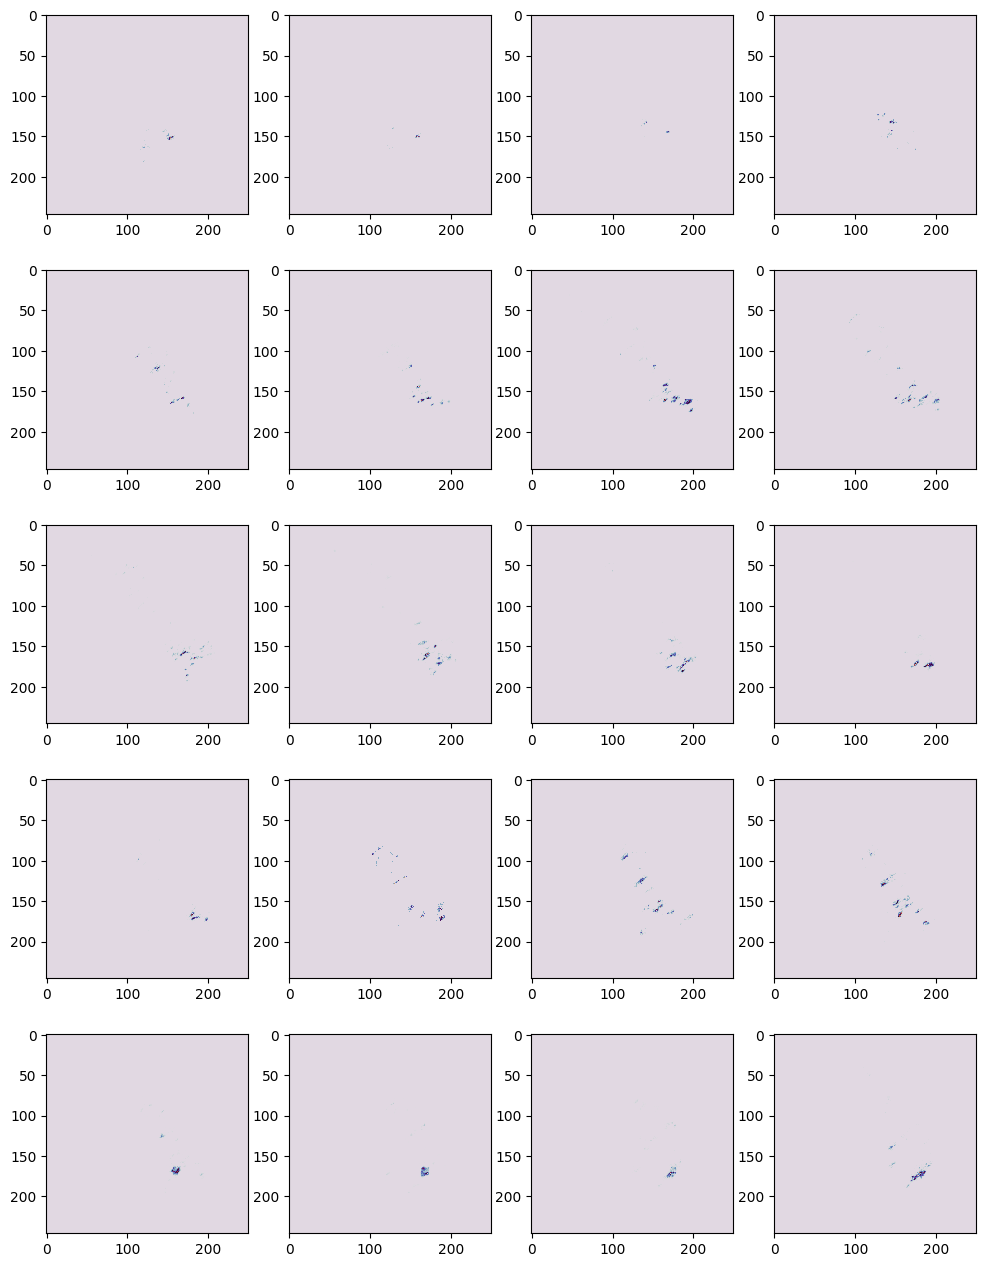

In [74]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(12,16))

for i in range(len(pruebaHist)):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(pruebaHist[i], cmap='twilight', interpolation='nearest')

In [41]:
np.save('500hist20step5', x[:500])